### PAIR VI MÓDULO 3: Estandarización

Para los ejercicios de Pair hemos utilizado el siguiente dataset: [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from scipy.stats import kstest

import warnings
warnings.filterwarnings('ignore')

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:
- Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [12]:
df = pd.read_pickle('data/spotify_songs_limpio.pkl')
df.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0amhzLwuGALhb81XyyuUlN,Chronic Law,Stay Real,Stay Real,18,196571,False,0.544,0.689,C,-7.764,minor,0.246,0.147,0.0,0.1510,0.422,87.328,compas_4,j-dance
1,3YQ5NYk2legzeloibRyXn1,Marksman,Verified Choppa 2,Verified Choppa 2,58,139093,False,0.725,0.604,G,-5.874,major,0.408,0.117,0.0,0.0855,0.449,199.995,compas_4,dancehall


In [15]:
numericas = df.select_dtypes(np.number).drop("popularity", axis= 1)

Vamos a utilizar RobustScaler porque decidimos no gestionar los outliers:

In [16]:
robust = RobustScaler()
numericas_robust = pd.DataFrame(robust.fit_transform(numericas), columns = numericas.columns)
numericas_robust.head(2)

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.184255,-0.157447,0.025974,-0.153345,4.038855,-0.065621,-0.000916,0.100897,-0.102381,-0.853817
1,-0.832951,0.612766,-0.194805,0.225755,7.351738,-0.116098,-0.000916,-0.266256,-0.038095,1.927569


In [17]:
for col in numericas_robust.columns:
    df[col] = numericas_robust[col]

In [18]:
df.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0amhzLwuGALhb81XyyuUlN,Chronic Law,Stay Real,Stay Real,18,-0.184255,False,-0.157447,0.025974,C,-0.153345,minor,4.038855,-0.065621,-0.000916,0.100897,-0.102381,-0.853817,compas_4,j-dance
1,3YQ5NYk2legzeloibRyXn1,Marksman,Verified Choppa 2,Verified Choppa 2,58,-0.832951,False,0.612766,-0.194805,G,0.225755,major,7.351738,-0.116098,-0.000916,-0.266256,-0.038095,1.927569,compas_4,dancehall


Vamos a eliminar las columans que tienen tantos valores únicos como filas:

In [19]:
df.drop(["track_id", "artists", "album_name", "track_name", "track_genre"], axis = 1, inplace= True)

In [20]:
# lo guardamos en DF estandarizado:
df.to_pickle('data/spotify_songs_estandarizado.pkl')

Vamos a comprobar visualmente cómo han quedado:


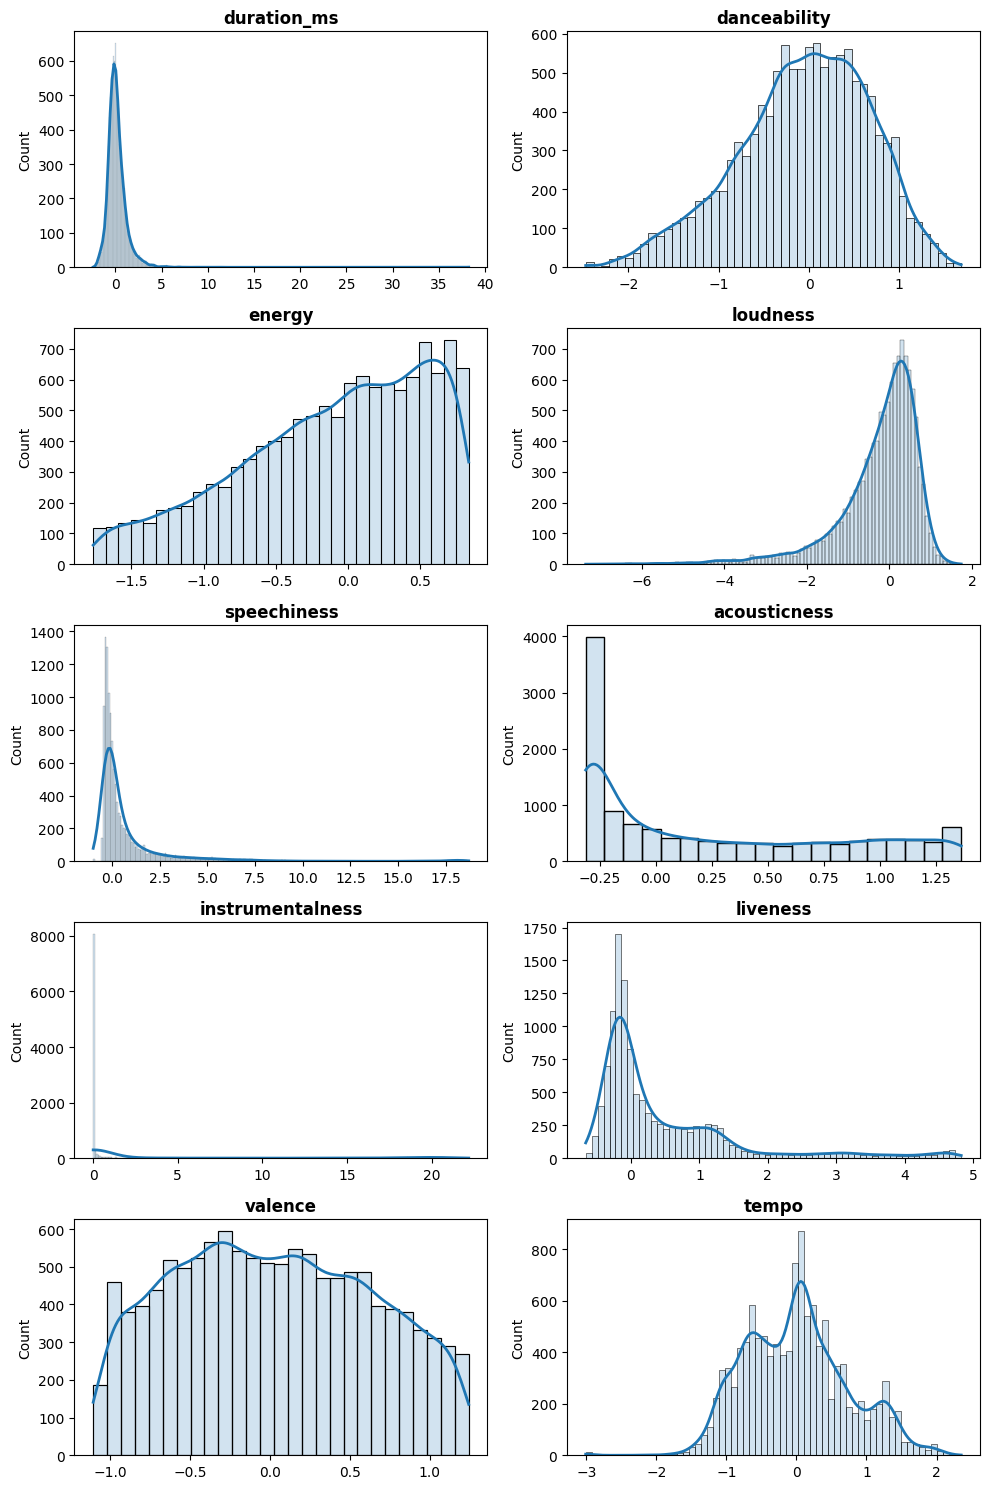

In [21]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (10, 15))

columnas_robust = numericas_robust.columns

axes = axes.flat

for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontweight = "bold")
    axes[i].set_xlabel("")

fig.tight_layout();

Hemos estandarizado las variables predictoras pero, según vimos el otro día, no podremos aplicar regresión lineal porque:
- La variable respuesta no era normal ni hemos podido normalizarla. 
- nuestras variables predictoras no son homocedásticas.
